In [1]:
import cometspy as c
import copy
import numpy as np
import cobra
from matplotlib import pyplot as plt
import sys
import random
from cometspy.utils import grow_rocks, pick_random_locations

In [2]:
ecoli = cobra.io.read_sbml_model('e_coli_core.xml')
iYS = cobra.io.read_sbml_model('iYS1720.xml')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-23


In [3]:
ecoli.reactions.get_by_id("BIOMASS_Ecoli_core_w_GAM").bounds = (0., 1000.)
iYS.reactions.get_by_id('BIOMASS_iRR1083_1').bounds = (0., 1000.)

In [4]:
ecoli_comets = c.model(ecoli)
iYS_comets = c.model(iYS)

D:\pythoncode\comets\.venv\Lib\site-packages\cometspy\model.py:654: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.smat = pd.concat([self.smat, cdf])
D:\pythoncode\comets\.venv\Lib\site-packages\cometspy\model.py:667: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.objective = [int(self.reactions[self.reactions.
D:\pythoncode\comets\.venv\Lib\site-packages\cometspy\model.py:654: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries b

In [5]:
ecoli_comets.open_exchanges()
iYS_comets.open_exchanges()
ecoli_comets.ensure_sinks_are_not_exchanges()
iYS_comets.ensure_sinks_are_not_exchanges()
#iAF_comets.open_exchanges()

In [6]:
grid_size = 50
#n_rocks = 30
random.seed(3)

In [7]:
#rock_locs = grow_rocks(n = n_rocks, xrange = [2,grid_size-2],yrange = [2,grid_size-2],mean_size = 10)

In [8]:
#forbidden_locs = copy.deepcopy(rock_locs)
n_founders = 100
ecoli_locs = pick_random_locations(n = n_founders, xrange = [1,grid_size], yrange = [1,grid_size])
iYS_locs = pick_random_locations(n_founders, [1,grid_size],[1,grid_size])
#iAF_locs = pick_random_locations(n_founders, [1,grid_size],[1,grid_size], forbidden_locs)

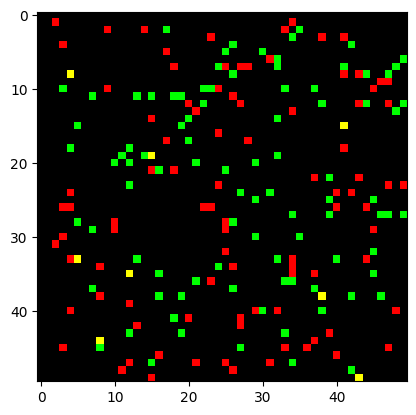

In [9]:
initial_image = np.zeros((grid_size,grid_size,3))
#for rock in rock_locs:
#    initial_image[rock[0],rock[1],0:3] = 0.5
for loc in ecoli_locs:
    initial_image[loc[0],loc[1],0] = 1 
for loc in iYS_locs:
    initial_image[loc[0],loc[1],1] = 1 
#for loc in iAF_locs:
#    initial_image[loc[0],loc[1],2] = 1 
plt.imshow(initial_image)

In [10]:
ecoli_initial_pop = [] 
for loc in ecoli_locs:
    ecoli_initial_pop.append([loc[0], loc[1], 1.e-5]) 
ecoli_comets.initial_pop = ecoli_initial_pop

In [11]:
iYS_initial_pop = [] 
for loc in iYS_locs:
    iYS_initial_pop.append([loc[0], loc[1], 1.e-5]) 
iYS_comets.initial_pop = iYS_initial_pop

In [12]:
#iAF_initial_pop = [] 
#for loc in iAF_locs:
#    iAF_initial_pop.append([loc[0], loc[1], 1.e-8]) 
#iAF_comets.initial_pop = iAF_initial_pop

In [13]:
layout = c.layout()

building empty layout model
models will need to be added with layout.add_model()


In [14]:
layout.grid = [grid_size,grid_size]

In [15]:
#layout.add_barriers(rock_locs)

In [16]:
layout.add_model(ecoli_comets)
layout.add_model(iYS_comets)

D:\pythoncode\comets\.venv\Lib\site-packages\cometspy\layout.py:1427: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.media = pd.concat([self.media, new_row],


In [17]:
#abundant_trace_metabolites = ['ca2_e', 'cl_e', 'co2_e', 'cobalt2_e', 'cu2_e', 'fe2_e', 'fe3_e', 'h_e', 'hco3_e', 'k_e', 'mg2_e', 'mn2_e', 'mobd_e', 'na1_e', 'ni2_e', 'pi_e', 'sel_e', 'so3_e', 'so4_e', 'tungs_e', 'zn2_e']

In [18]:
#for met in abundant_trace_metabolites:
#    layout.set_specific_metabolite(met, 1000.,static= True)

In [19]:
layout.set_specific_metabolite('nh4_e',0.1) 
layout.set_specific_metabolite('o2_e', 0)
layout.set_specific_metabolite('glc__D_e', 0.1)
layout.set_specific_metabolite('pi_e',0.1)
layout.set_specific_metabolite('h2o_e',0.1)
#layout.set_global_periodic_media('h2o_e',function = 'step',amplitude = 0.1,period = 5, phase = 0, offset = -0.0001)
#layout.set_global_periodic_media('h2o_e',function = 'step',amplitude = 0,period = 1, phase = 0, offset = -0.0001)#设置环境水
layout.set_specific_metabolite('h_e',1e-7)
layout.set_specific_metabolite('so4_e',0.1)#设置氢离子
layout.set_specific_metabolite('ca2_e',0.1)#设置氢离子
layout.set_specific_metabolite('fe3_e',0.1)#设置氢离子
layout.set_specific_metabolite('k_e',0.1)#设置氢离子
layout.set_specific_metabolite('mg2_e',0.1)#设置氢离子

In [20]:
#for x in range(grid_size):
#    layout.set_specific_static_at_location('o2_e', (0,x), 0.01)
#    layout.set_specific_refresh_at_location('nh4_e', (0,x), 0.000001)

In [21]:
for x in range(grid_size):
    layout.set_specific_static_at_location('o2_e', (grid_size-1,x), 0)
    layout.set_specific_refresh_at_location('o2_e', (25,x), 0)
    layout.set_specific_refresh_at_location('o2_e', (26,x), 0)
    layout.set_specific_refresh_at_location('o2_e', (27,x), 0)
    layout.set_specific_refresh_at_location('o2_e', (28,x), 0)
    layout.set_specific_refresh_at_location('o2_e', (29,x), 0)
    layout.set_specific_refresh_at_location('o2_e', (30,x), 0)
    layout.set_specific_static_at_location('o2_e', (0,x), 0.001) 

In [22]:
# for x in range(grid_size):
#     layout.set_specific_static_at_location('nh4_e', (x,0), 0.0)
#     layout.set_specific_refresh_at_location('glc__D_e', (x,0), .0001)
#     #layout.set_specific_refresh_at_location('meoh_e', (x,0), .000001)
#     layout.set_specific_refresh_at_location('succ_e', (x,0), .000001)

In [23]:
params = c.params()
params.set_param('timeStep', 0.1)
params.set_param('maxCycles', 20)
params.set_param('maxSpaceBiomass', 10)
params.set_param('deathRate', 0.0001) # die at rate of 1/10000 per hour
params.set_param('writeBiomassLog', True)
params.set_param('BiomassLogRate', 5)
params.set_param('writeMediaLog', True)
params.set_param('MediaLogRate', 5)
params.set_param("writeFluxLog", True)
params.set_param("FluxLogRate", 5)
params.set_param('numRunThreads', 3)
params.set_param('defaultKm', 0.000001)

In [24]:
sim = c.comets(layout, params) 
sim.run(delete_files = False) 


Running COMETS simulation ...

Debug Here ...


D:\pythoncode\comets\.venv\Lib\site-packages\cometspy\comets.py:423: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  self.fluxes = pd.read_csv(self.working_dir + self.parameters.all_params['FluxLogName'],
D:\pythoncode\comets\.venv\Lib\site-packages\cometspy\comets.py:437: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  self.media = pd.read_csv(self.working_dir + self.parameters.all_params[


Done!


<Axes: xlabel='cycle'>

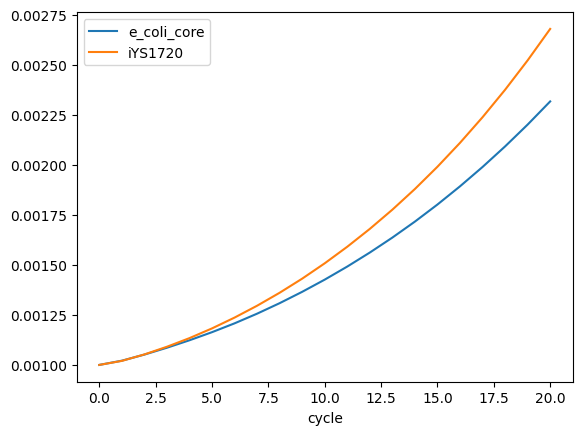

In [25]:
sim.total_biomass.plot(x = 'cycle')

In [26]:
print(sim.total_biomass)

    cycle  e_coli_core   iYS1720
0       0     0.001000  0.001000
1       1     0.001021  0.001020
2       2     0.001052  0.001052
3       3     0.001086  0.001091
4       4     0.001123  0.001134
5       5     0.001164  0.001182
6       6     0.001208  0.001236
7       7     0.001256  0.001296
8       8     0.001308  0.001360
9       9     0.001365  0.001431
10     10     0.001426  0.001508
11     11     0.001491  0.001590
12     12     0.001561  0.001679
13     13     0.001636  0.001775
14     14     0.001716  0.001879
15     15     0.001801  0.001990
16     16     0.001892  0.002109
17     17     0.001989  0.002237
18     18     0.002091  0.002374
19     19     0.002200  0.002521
20     20     0.002316  0.002678


Text(0, 0.5, 'Concentration (mmol)')

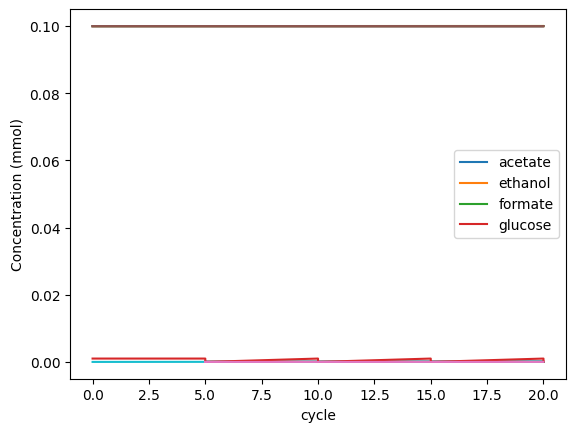

In [27]:
media = sim.media.copy()
media2 = sim.media.copy()
media = media[media.conc_mmol<900]

fig, ax = plt.subplots()
media.groupby('metabolite').plot(x='cycle', ax =ax, y='conc_mmol')
ax.legend(('acetate','ethanol', 'formate', 'glucose',))
ax.set_ylabel("Concentration (mmol)")

In [28]:
txt=media.groupby('metabolite')
print(txt.get_group('h2o_e').reset_index)

<bound method DataFrame.reset_index of        metabolite  cycle   x   y  conc_mmol
7500        h2o_e      0   1   1        0.1
7501        h2o_e      0   1   2        0.1
7502        h2o_e      0   1   3        0.1
7503        h2o_e      0   1   4        0.1
7504        h2o_e      0   1   5        0.1
...           ...    ...  ..  ..        ...
174895      h2o_e     20  50  46        0.1
174896      h2o_e     20  50  47        0.1
174897      h2o_e     20  50  48        0.1
174898      h2o_e     20  50  49        0.1
174899      h2o_e     20  50  50        0.1

[12500 rows x 5 columns]>


In [29]:
txt2=media2.groupby('metabolite')
print(txt2.get_group('co2_e').reset_index)

<bound method DataFrame.reset_index of        metabolite  cycle   x   y     conc_mmol
30050       co2_e      5   1   1  1.416837e-06
30051       co2_e      5   1   2  1.408737e-06
30052       co2_e      5   1   3  1.393045e-06
30053       co2_e      5   1   4  1.370905e-06
30054       co2_e      5   1   5  1.344236e-06
...           ...    ...  ..  ..           ...
159895      co2_e     20  50  46  2.815661e-07
159896      co2_e     20  50  47  2.884345e-07
159897      co2_e     20  50  48  2.939082e-07
159898      co2_e     20  50  49  2.977156e-07
159899      co2_e     20  50  50  2.996674e-07

[10000 rows x 5 columns]>


In [30]:
im = sim.get_biomass_image('e_coli_core', params.all_params['maxCycles'])

In [31]:
im2 = sim.get_biomass_image('iYS1720',params.all_params['maxCycles'])

In [32]:
#im3 = sim.get_biomass_image('iAF692',params.all_params['maxCycles'])

In [33]:
final = np.zeros((grid_size,grid_size,3))

In [34]:
final[:,:,0] = im / np.max(im)

In [35]:
final[:,:,1] = im2 / np.max(im2)

In [36]:
#final[:,:,2] = im3 / np.max(im3)

In [37]:
#for rock in rock_locs:
#    final[rock[0]-1,rock[1]-1,0:3] = 0.4

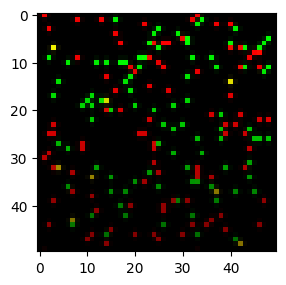

In [38]:
fig, ax = plt.subplots(figsize = (3.1, 3.1))
ax.imshow(final)
plt.imshow(final)

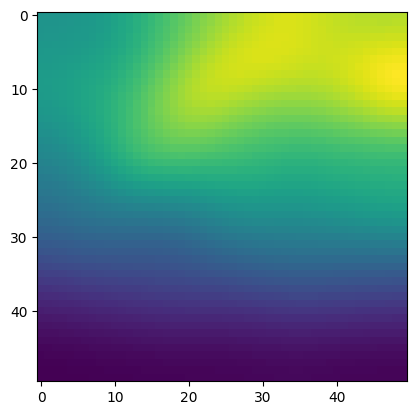

In [61]:
plt.imshow(sim.get_metabolite_image("h2o_e",20))

In [40]:
#import pandas as pd
#with pd.ExcelWriter('soil有水.xlsx') as writer:  
#    txt2.to_excel(writer, index = False, sheet_name='co2')

In [41]:
print(ecoli_locs)

[(2, 33), (47, 12), (18, 41), (7, 28), (28, 10), (26, 44), (30, 3), (21, 18), (48, 11), (12, 27), (47, 25), (26, 4), (23, 47), (33, 4), (40, 32), (24, 42), (12, 43), (47, 21), (45, 3), (10, 24), (14, 15), (40, 29), (35, 34), (44, 37), (38, 8), (48, 26), (8, 41), (8, 4), (9, 47), (49, 43), (24, 40), (21, 15), (7, 27), (2, 14), (31, 2), (22, 37), (45, 36), (40, 48), (13, 34), (5, 17), (26, 22), (34, 34), (46, 16), (40, 4), (33, 34), (38, 38), (45, 33), (47, 31), (7, 18), (7, 25), (29, 10), (3, 38), (16, 24), (34, 26), (33, 44), (35, 12), (1, 34), (22, 43), (28, 25), (36, 23), (10, 9), (1, 2), (19, 15), (17, 17), (3, 41), (49, 15), (23, 49), (4, 3), (42, 13), (45, 47), (12, 20), (13, 21), (9, 46), (46, 40), (11, 26), (39, 12), (10, 45), (33, 5), (26, 3), (26, 40), (15, 41), (8, 43), (12, 47), (32, 25), (44, 8), (43, 39), (24, 4), (41, 27), (6, 31), (17, 28), (3, 23), (29, 45), (26, 23), (2, 9), (41, 20), (29, 25), (23, 24), (35, 37), (34, 8), (42, 27)]


In [42]:
print(iYS_locs)

[(10, 22), (5, 30), (27, 49), (2, 35), (33, 32), (11, 15), (44, 8), (21, 25), (41, 18), (25, 45), (18, 4), (12, 22), (43, 33), (34, 24), (20, 21), (3, 34), (10, 37), (8, 4), (45, 8), (27, 34), (22, 39), (25, 29), (43, 19), (5, 25), (47, 34), (15, 41), (38, 19), (17, 20), (33, 5), (48, 42), (23, 12), (11, 13), (38, 46), (24, 27), (27, 39), (8, 26), (45, 27), (35, 16), (32, 45), (8, 44), (2, 17), (38, 16), (36, 21), (37, 7), (37, 26), (35, 45), (6, 32), (15, 19), (43, 12), (10, 3), (27, 47), (18, 12), (40, 38), (28, 26), (12, 44), (19, 15), (27, 46), (14, 32), (30, 35), (15, 5), (49, 43), (13, 48), (21, 16), (28, 5), (19, 14), (10, 23), (4, 42), (29, 7), (19, 32), (19, 11), (14, 20), (47, 15), (33, 40), (35, 12), (7, 24), (7, 41), (36, 34), (30, 29), (11, 7), (12, 49), (24, 31), (6, 49), (12, 38), (36, 33), (38, 42), (20, 29), (4, 26), (20, 10), (10, 33), (7, 48), (7, 32), (38, 38), (25, 39), (33, 13), (8, 47), (40, 30), (11, 18), (20, 12), (11, 19), (37, 37)]
